In [1]:
from sympy import symbols, init_printing
import sympy
import sympy.physics.mechanics as me
from pydy.system import System
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import InputShaping as shaping
import itable
import pandas as pd
%matplotlib inline
init_printing()

In [2]:
# Manually fill in your eigenvalues and their conjugates
s_1 = np.complex(-0.1, 9.9995)
s_2 = np.complex(-0.36, 17.9964)
s_1_star = np.conjugate(s_1)
s_2_star = np.conjugate(s_2)
n = int(2)
m = int(1)
l = int(np.ceil((2*n) / (m + 1)))
# rows = (m_amount + 1) * (l_amount + 1)
# columns = n_amount * 2

In [3]:
s = np.array([[s_1],[s_2]])
s_star = np.array([[s_1_star],[s_2_star]])
G = np.array([[1,1.5],[2,1],[1,1]])

In [4]:
g_0_0 = 1
g_0_1 = 2
g_0_2 = 1

g_1_0 = 1.5
g_1_1 = 1
g_1_2 = 1

In [5]:
# P = []
# P_star = []
# n = 0
# np_P = np.zeros((rows,1))
# for i in range(10000):
#     steps = np.linspace(0,1,10000)
#     T = steps[i]
# #     for n in range(n_amount):
#     for m in range(m_amount):
#         for l in range(l_amount):
#             P.append(G[n][m]*np.exp(-s[n] * l * T))
#             P_star.append(G[n][m]*np.exp(-s_star[n] * l * T))
# #         np_P = np.vstack((np_P,np.array([P])))
# #         np_P = np.vstack((np_P,np.array([P_star])))
    

In [6]:
a_full = np.array([0,0,0,0,0,0])
for i in range(10000):
    steps = np.linspace(0,1,10000)
    T = steps[i]
    P = np.array([[g_0_1, g_0_1*np.exp(-s_1*T), g_0_1*np.exp(-s_1*l*T),
             g_1_1, g_1_1*np.exp(-s_1*T), g_1_1*np.exp(-s_1*l*T)],
            [g_0_1, g_0_1*np.exp(-s_1_star*T), g_0_1*np.exp(-s_1_star*l*T),
             g_1_1, g_1_1*np.exp(-s_1_star*T), g_1_1*np.exp(-s_1_star*l*T)],
           [g_0_2, g_0_2*np.exp(-s_2*T), g_0_2*np.exp(-s_2*l*T),
             g_1_2, g_1_2*np.exp(-s_2*T), g_1_2*np.exp(-s_2*l*T)],
            [g_0_2, g_0_2*np.exp(-s_2_star*T), g_0_2*np.exp(-s_2_star*l*T),
             g_1_2, g_1_2*np.exp(-s_2_star*T), g_1_2*np.exp(-s_2_star*l*T)],
           [1,1,1,0,0,0],[0,0,0,1,1,1]])
    P_inv = np.linalg.pinv(P)
    w = np.array([[0],[0],[0],[0],[1],[1]])
    a = np.dot(P_inv,w)
    a_row = np.real(a.reshape(1,6))
    a_full = np.vstack((a_full, a_row))
a_full = np.delete(a_full,0,0)
index=np.array([0])
for i in range(6):
    index = np.vstack((index,np.argwhere(a_full[:,i][4:] > 0)[0][0]))
index = np.delete(index, (0), axis=0)
index_arg = np.argmax(index)
time2 = round(steps[4:][index[index_arg][0]],4)
time3 = round(time2 * 2,4)
impulse1_1 = round(a_full[:,0][4:][index[index_arg][0]],4)
impulse1_2 = round(a_full[:,1][4:][index[index_arg][0]],4)
impulse2_1 = round(a_full[:,2][4:][index[index_arg][0]],4)
impulse2_2 = round(a_full[:,3][4:][index[index_arg][0]],4)
impulse3_1 = round(a_full[:,4][4:][index[index_arg][0]],4)
impulse3_2 = round(a_full[:,5][4:][index[index_arg][0]],4)

# print('Time    Amp1    Amp2\n0       {}\n{}'.format(impulse1_1,time2))
# plt.plot(steps,a_full[:,0])
# plt.plot(steps,a_full[:,1])
# plt.plot(steps,a_full[:,2])
# plt.plot(steps,a_full[:,3])
# plt.plot(steps,a_full[:,4])
# plt.plot(steps,a_full[:,5])
# plt.ylim(-10,10)
# plt.xlim(0.0,0.25);
df = pd.DataFrame({"Input 1":[impulse1_1,impulse1_2, impulse2_1], 
                   "Input 2":[impulse2_2,impulse3_1, impulse3_2],
                   "Times":[0,time2,time3]})
itable.PrettyTable(df)

Input 1,Input 2,Times
0.463,0.1185,0.0
0.036,0.8808,0.2055
0.5009,0.0006,0.411


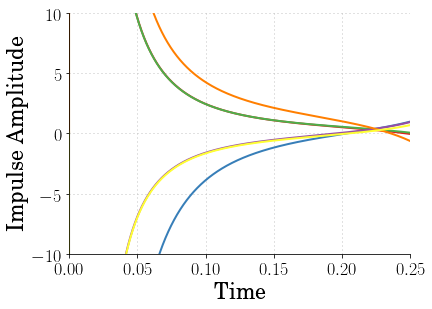

In [7]:
plt.plot(steps,a_full[:,0])
plt.plot(steps,a_full[:,1])
plt.plot(steps,a_full[:,2])
plt.plot(steps,a_full[:,3])
plt.plot(steps,a_full[:,4])
plt.plot(steps,a_full[:,5])
plt.ylim(-10,10)
plt.xlim(0.0,0.25);
plt.xlabel('Time')
plt.ylabel('Impulse Amplitude')
# plt.savefig('/Users/forrest/Desktop/Multishaping.pdf')

In [9]:
example_shaper = shaping.ZV(4.43, 0.01084)
Shaper = example_shaper.shaper
# shaped_s_curve = shaping.shaped_input(shaping.s_curve, time, total,2, 1, 1)
Shaper

array([[ 0.0000,  0.5085],
       [ 0.1129,  0.4915]])

NameError: name 'shaped_s_curve' is not defined

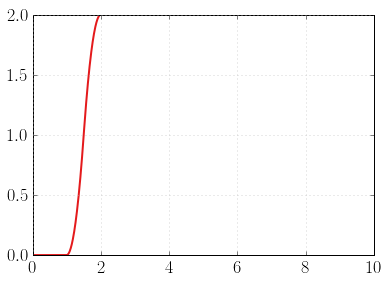

In [10]:
time = np.linspace(0,10,1000)
plt.plot(time,shaping.s_curve(time, 2, 1, 1))
plt.plot(time,shaped_s_curve)
plt.ylim(0,3);

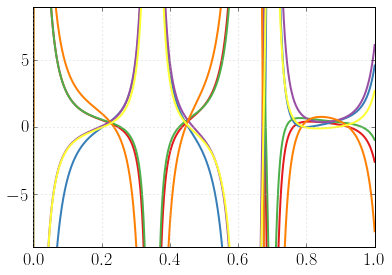

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(steps,a_full[:,0])
plt.plot(steps,a_full[:,1])
plt.plot(steps,a_full[:,2])
plt.plot(steps,a_full[:,3])
plt.plot(steps,a_full[:,4])
plt.plot(steps,a_full[:,5])
# ax.annotate('local max', xy=(0.1, 1), xytext=(0.2, 1),
#             arrowprops=dict(facecolor='black', shrink=0.1),
#             )
plt.ylim(-9,9)
# plt.xlim(0.05,0.25);

In [14]:
skip=4
np.argwhere(np.logical_and(np.logical_and(np.logical_and((np.logical_and(np.greater_equal(a_full[:,0][skip:],0),
                                          np.greater_equal(a_full[:,1][skip:],0))),
                           (np.logical_and(np.greater_equal(a_full[:,2][skip:],0),
                                          np.greater_equal(a_full[:,3][skip:],0)))),
           np.logical_and((np.logical_and(np.greater_equal(a_full[:,4][skip:],0),
                                          np.greater_equal(a_full[:,5][skip:],0))),
                           (np.logical_and(np.greater_equal(a_full[:,1][skip:],0),
                                          np.greater_equal(a_full[:,1][skip:],0))))),
                          np.logical_and(np.logical_and((np.logical_and(np.greater_equal(a_full[:,1][skip:],0),
                                          np.greater_equal(a_full[:,1][skip:],0))),
                           (np.logical_and(np.greater_equal(a_full[:,1][skip:],0),
                                          np.greater_equal(a_full[:,1][skip:],0)))),
           np.logical_and((np.logical_and(np.greater_equal(a_full[:,1][skip:],0),
                                          np.greater_equal(a_full[:,1][skip:],0))),
                           (np.logical_and(np.greater_equal(a_full[:,1][skip:],0),
                                          np.greater_equal(a_full[:,1][skip:],0)))))))

array([[2051],
       [2052],
       [2053],
       [2054],
       [2055],
       [2056],
       [2057],
       [2058],
       [2059],
       [2060],
       [2061],
       [2062],
       [2063],
       [2064],
       [2065],
       [2066],
       [2067],
       [2068],
       [2069],
       [2070],
       [2071],
       [2072],
       [2073],
       [2074],
       [2075],
       [2076],
       [2077],
       [2078],
       [2079],
       [2080],
       [2081],
       [2082],
       [2083],
       [2084],
       [2085],
       [2086],
       [2087],
       [2088],
       [2089],
       [2090],
       [2091],
       [2092],
       [2093],
       [2094],
       [2095],
       [2096],
       [2097],
       [2098],
       [2099],
       [2100],
       [2101],
       [2102],
       [2103],
       [2104],
       [2105],
       [2106],
       [2107],
       [2108],
       [2109],
       [2110],
       [2111],
       [2112],
       [2113],
       [2114],
       [2115],
       [2116],
       [21

In [16]:
a_full[:,0][4:][2051]